In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display
import csv
import scipy.signal

In [2]:
def gaussian_window(size, sigma=0.1):
    """
    Create a Gaussian window.

    Parameters:
        size (int): Length of the window.
        sigma (float): Standard deviation factor, controls the width of the Gaussian.

    Returns:
        np.array: Gaussian window.
    """
    n = np.arange(size)
    center = (size - 1) / 2
    return np.exp(-0.5 * ((n - center) / (sigma * center)) ** 2)


def stft(signal, fs, window_size, hop_size, window_type='hann', sigma=0.1):
    """
    Perform Short-Time Fourier Transform (STFT) on a signal.

    Parameters:
        signal (np.array): Input signal.
        fs (int): Sampling frequency.
        window_size (int): Size of the window (in samples).
        hop_size (int): Hop size (in samples).
        window_type (str): Type of window function ('hann', 'hamming', etc.).

    Returns:
        np.array: STFT matrix (complex values).
        np.array: Frequency bins.
        np.array: Time frames.
    """
    # Create window
    if window_type == 'hann':
        window = np.hanning(window_size)
    elif window_type == 'hamming':
        window = np.hamming(window_size)
    elif window_type == 'gaussian':
        window = gaussian_window(window_size, sigma)
    else:
        raise ValueError(f"Unsupported window type: {window_type}")

    # Number of frames
    num_frames = (len(signal) - window_size) // hop_size + 1

    # Preallocate STFT matrix
    stft_matrix = np.zeros((window_size // 2 + 1, num_frames), dtype=np.complex128)

    for i in range(num_frames):
        start_idx = i * hop_size
        end_idx = start_idx + window_size
        frame = signal[start_idx:end_idx] * window

        # Compute FFT and take the positive frequencies
        stft_matrix[:, i] = np.fft.rfft(frame)

    # Frequency and time vectors
    freq_bins = np.fft.rfftfreq(window_size, d=1/fs)
    time_frames = np.arange(num_frames) * hop_size / fs

    return stft_matrix, freq_bins, time_frames

### Simple solver test with sine wave

STFT matrix shape: (129, 61)


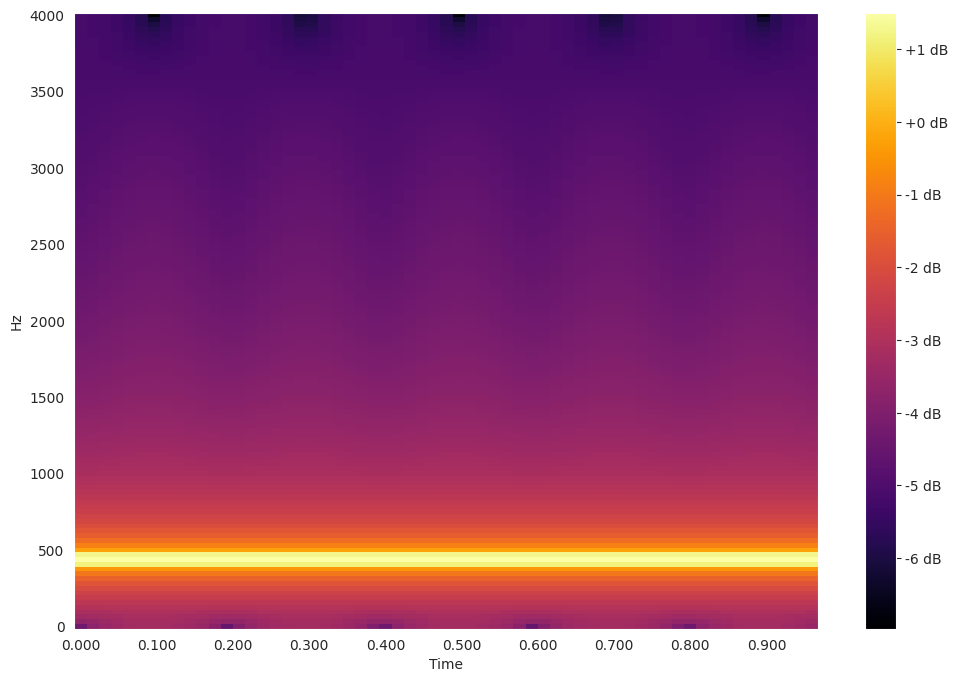

In [3]:
fs = 8000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1-second time vector
signal = 0.5 * np.sin(2 * np.pi * 440 * t)  # A 440 Hz sine wave

window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = stft(signal, fs, window_size, hop_size, window_type='hann')

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### Getting real data from CSV file

In [4]:
data = []
with open("../Data_acquisition/data/8kHz_sampling/unknown_fs=8kHz_1.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric

data = np.array(data, dtype=np.float32)
print(f"Data length before resampling: {len(data)}")
print(f"Data type before resampling: {type(data[0])}")
display.Audio(data, rate=8000)

Data length before resampling: 8000
Data type before resampling: <class 'numpy.float32'>


In [5]:
for sample in data:
    print(sample)

1.80004
6.3802
5.31602
5.19241
-0.05858
12.5808
4.54639
3.61135
2.23162
5.7354
6.1382
-0.145
3.33419
5.9614
5.8939
5.86624
2.76402
10.6119
1.51443
-0.2958
2.31502
11.7139
3.36508
1.49869
-0.11631
3.48776
1.70544
3.33996
9.64335
7.79641
5.62273
1.79945
5.60421
3.29643
2.26744
6.22898
0.16685
-0.69219
10.8408
16.06827
3.01688
3.25499
2.57941
9.97991
6.50038
0.88789
1.17441
0.24605
5.31324
3.50034
-0.16399
4.03534
2.25232
4.74673
7.74455
4.63473
2.45812
6.32146
11.68624
2.17346
0.65625
0.28351
1.76997
6.40525
10.56153
7.10438
5.77225
1.55216
5.86616
-0.60436
4.14074
6.73723
3.31116
0.85629
3.13733
9.32257
8.18912
13.7004
0.70022
2.22383
1.32192
6.39988
9.65839
4.97599
2.08333
0.44388
4.9072
5.89587
10.25227
2.3095
2.42801
3.52908
1.8827
6.54828
8.96874
6.28335
0.10073
2.28445
1.8946
3.99477
9.19685
6.17413
3.85054
1.58282
7.04865
1.06823
8.28749
1.94256
2.92584
6.13404
2.72925
4.36974
3.5521
9.08282
12.86574
5.91872
0.37382
0.1199
1.18214
8.80296
11.64854
3.94267
-1.04663
2.64831
10.69872

In [6]:
resampled_data = librosa.resample(data, orig_sr=8e3, target_sr=48e3)
print(f"Data length after resampling: {len(resampled_data)}")
print(f"Data type after resampling: {type(resampled_data[0])}")
display.Audio(resampled_data, rate=48000)

Data length after resampling: 48000
Data type after resampling: <class 'numpy.float32'>


In [7]:
for sample in resampled_data:
    print(sample)

2.4875906
3.466992
4.384868
5.11907
5.585717
5.763887
5.702867
5.508666
5.3132963
5.2360215
5.348211
5.6518607
6.077241
6.49938
6.768383
6.74585
6.339427
5.5287304
4.3779416
3.0325599
1.7001033
0.6170821
0.0071994066
0.038062036
0.7848649
2.2089977
4.1569633
6.3809953
8.578133
10.440652
11.708218
12.211901
11.901809
10.853319
9.251048
7.3538165
5.447467
3.794478
2.58987
1.9315066
1.8099931
2.119446
2.6863418
3.3101063
3.8069751
4.048238
3.985249
3.65656
3.176062
2.7050376
2.4141345
2.4432733
2.867816
3.6780062
4.7759495
5.990876
7.109765
7.9173727
8.237861
7.969864
7.108185
5.747848
4.069652
2.3099234
0.7201048
-0.4762423
-1.1210692
-1.1472265
-0.5871037
0.43673468
1.7368296
3.0969353
4.3119802
5.2242494
5.749097
5.885615
5.71065
5.357826
4.9861007
4.7443204
4.7389607
5.0114655
5.529646
6.194751
6.8626947
7.375079
7.593754
7.431851
6.87501
5.9883647
4.907707
3.8163428
2.9119725
2.3699408
2.3098803
2.772193
3.7088234
4.9901056
6.426268
7.799469
8.900232
9.561485
9.683965
9.248722
8.3149

# Using original data

### STFT for real data using implemented solver

STFT matrix shape: (129, 61)


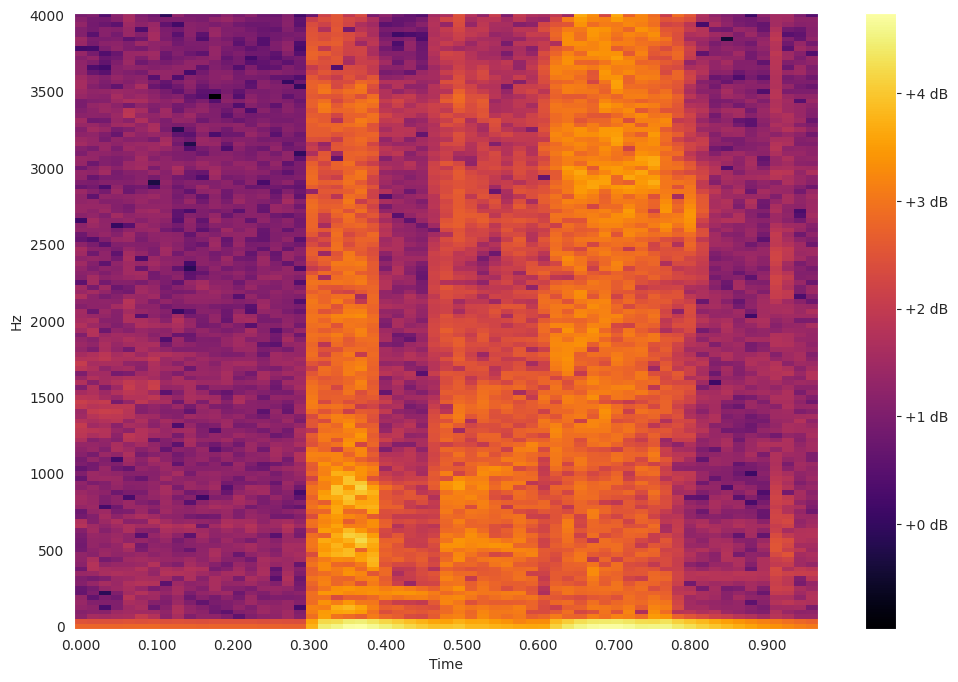

In [8]:
fs = 8e3
window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = stft(data, fs, window_size, hop_size, window_type='hann')

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### STFT for real data using Librosa solver

Librosa STFT matrix shape: (129, 63)


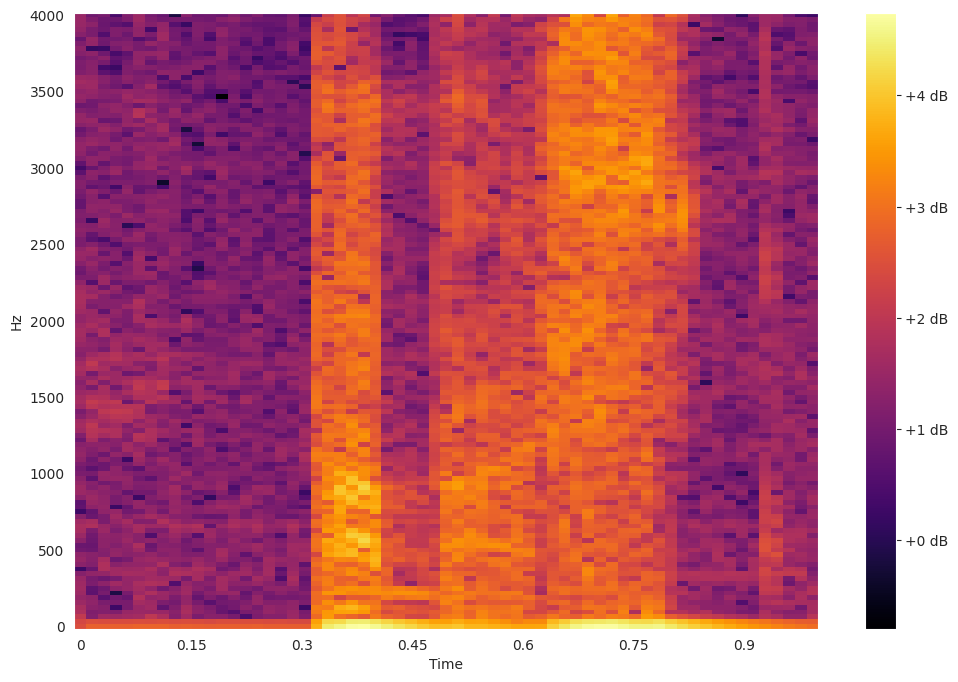

In [9]:
librosa_stft_matrix = librosa.stft(data, n_fft=window_size, hop_length=hop_size, window='hann')

print(f"Librosa STFT matrix shape: {librosa_stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(librosa_stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

# Using resampled data

### STFT for real data using implemented solver

STFT matrix shape: (129, 374)


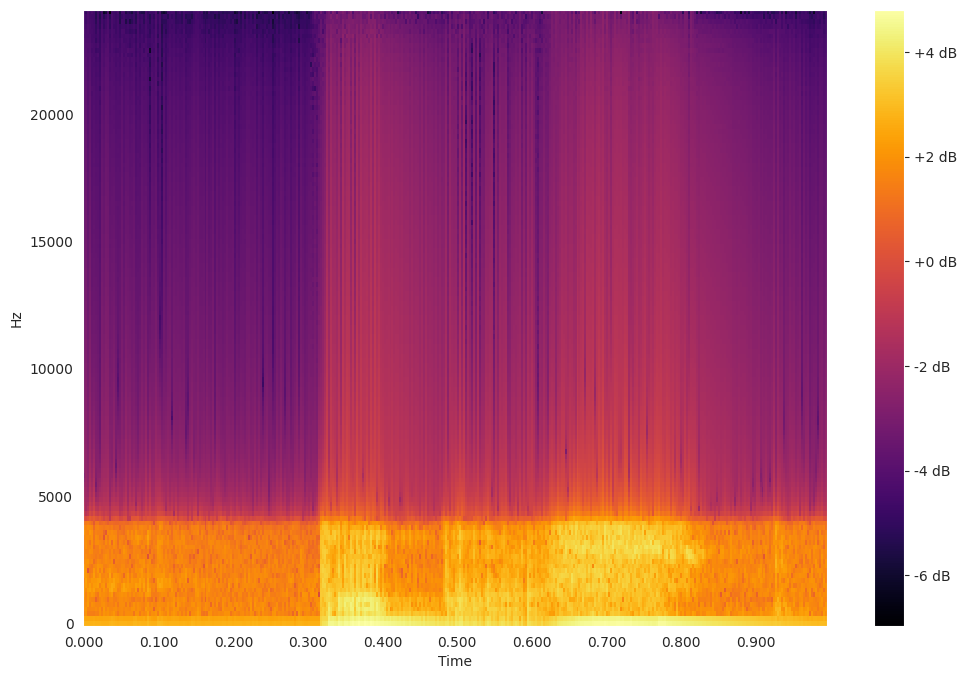

In [10]:
fs = 48e3
window_size = 256
hop_size = 128

stft_matrix, freq_bins, time_frames = stft(resampled_data, fs, window_size, hop_size, window_type='hann')

print(f"STFT matrix shape: {stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

### STFT for real data using Librosa solver

Librosa STFT matrix shape: (129, 376)


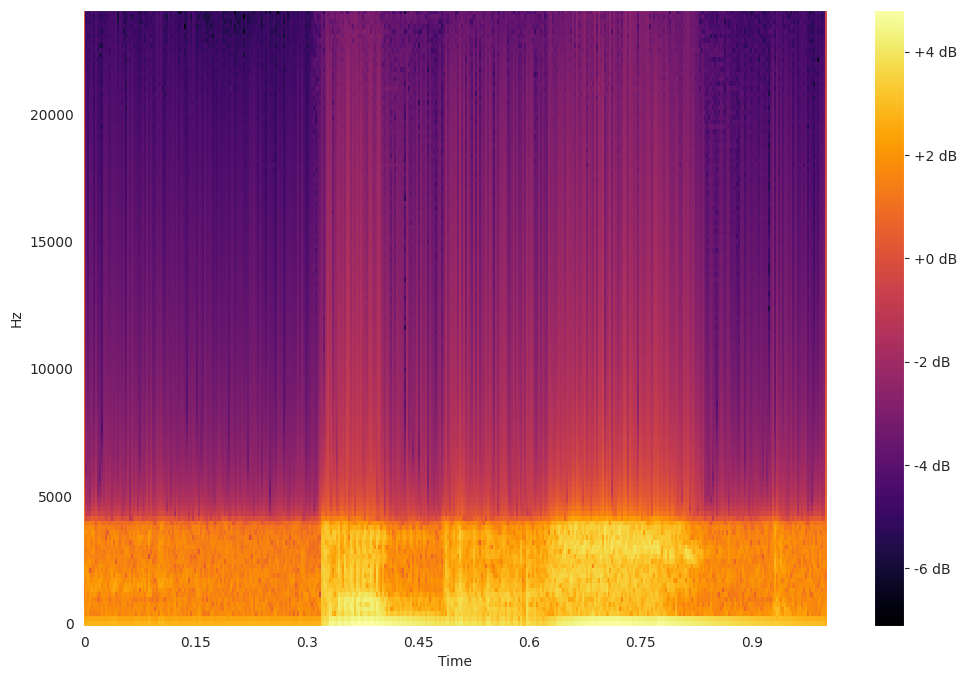

In [11]:
librosa_stft_matrix = librosa.stft(resampled_data, n_fft=window_size, hop_length=hop_size, window='hann')

print(f"Librosa STFT matrix shape: {librosa_stft_matrix.shape}")

plt.figure(figsize=(12, 8))
librosa.display.specshow(np.log10(np.abs(librosa_stft_matrix)), x_axis='time', y_axis='linear', sr=fs, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

# STFT solver with spectrum reducing

In [12]:
def stft_with_band_limiting(signal_data, fs_signal, N_output, fs_output, hop_size_output, fmin):
    """
    Calculates STFT, limits spectrum to target band and adjusts the number of buckets in the spectrum.

    Parameters:
        signal_data (ndarray): Input signal in time domain.
        fs (int): Sampling rate of the input signal (Hz).
        n_buckets (int): Number of buckets in the target spectrum.
        f_min (float): Lower limit frequency of the spectrum (Hz).
        hop_size (int): Offset of subsequent time windows in samples.
        window_size (int) (optional): Window size in samples (by default twice hop_size).

    Returns:
        reduced_spectrogram (ndarray): Reduced spectrum, ready to be used in a neural network.
        frequencies (ndarray): Frequencies corresponding to target spectrum buckets.

    """
    N_input = int(np.ceil((fs_signal/fs_output)*N_output))
    hop_size_input = int(np.ceil((fs_signal/fs_output)*hop_size_output))



    window = np.hanning(N_input)
    num_frames = (len(signal_data) - N_input) // hop_size_input + 1

    print(f"Num_frames: {num_frames}")
    print(f"hop_size_input: {hop_size_input}")
    print(f"N_input: {N_input}")
    print(N_input // 2 + 1)
    print(int(num_frames))

    # Preallocate STFT matrix
    stft_matrix = np.zeros((N_input // 2 + 1, num_frames), dtype=np.complex128)

    for i in range(num_frames):
        start_idx = i * hop_size_input
        end_idx = start_idx + N_input
        frame = signal_data[start_idx:end_idx] * window

        # Compute FFT and take the positive frequencies
        stft_matrix[:, i] = np.fft.rfft(frame)

    # Calculate frequencies for rfft
    frequencies = np.fft.rfftfreq(N_input, d=1/fs_signal)

    # Bins indexes for final bandwidth
    idx_min = np.searchsorted(frequencies, fmin, side="left")
    idx_max = min(idx_min + N_output, len(frequencies))

    band_limited_stft_matrix = stft_matrix[idx_min:idx_max, :]

    time_frames = np.arange(num_frames) * hop_size_input / fs_signal

    return band_limited_stft_matrix, frequencies[idx_min:idx_max], time_frames

Num_frames: 61
hop_size_input: 768
N_input: 1536
769
61
STFT matrix shape: (256, 61)


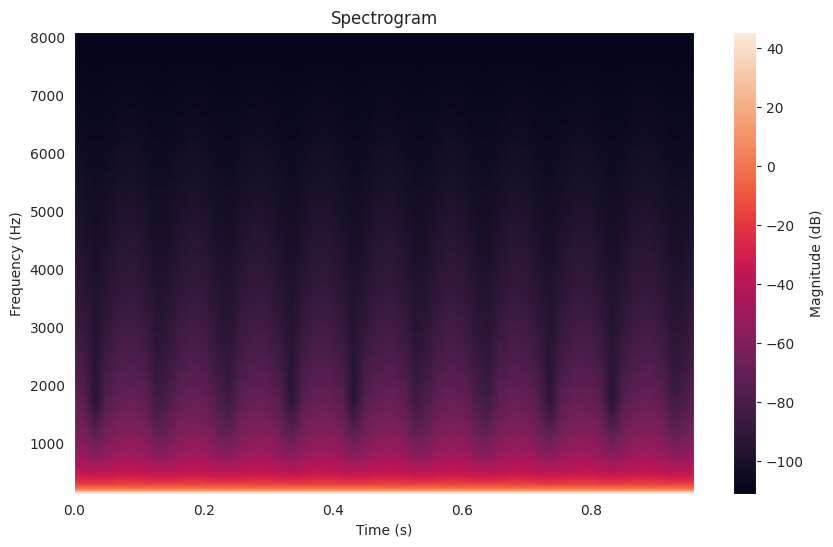

In [13]:
fs_signal = 48e3
fs_output = 8e3
N_output = 256
hop_size_output = 128
f_min = 120
signal_frequency = 120

t = np.linspace(0, 1, int(fs_signal), endpoint=False)  # 1-second time vector
signal = 0.5 * np.sin(2 * np.pi * signal_frequency * t)  # sine wave

stft_matrix, freq_bins, time_frames = stft_with_band_limiting(signal, fs_signal=fs_signal, N_output=N_output, fs_output=fs_output, hop_size_output=hop_size_output, fmin=f_min)

print(f"STFT matrix shape: {stft_matrix.shape}")

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_frames, freq_bins, 20 * np.log10(np.abs(stft_matrix)), shading='gouraud')
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

Num_frames: 61
hop_size_input: 768
N_input: 1536
769
61
STFT matrix shape: (256, 61)


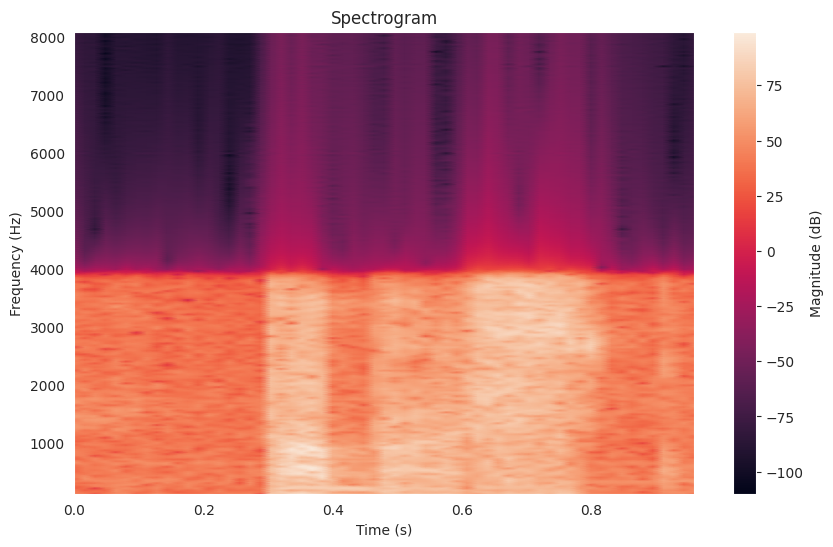

In [14]:
fs_signal = 48e3
fs_output = 8e3
N_output = 256
hop_size_output = 128
f_min = 120

stft_matrix, freq_bins, time_frames = stft_with_band_limiting(resampled_data, fs_signal=fs_signal, N_output=N_output, fs_output=fs_output, hop_size_output=hop_size_output, fmin=f_min)

print(f"STFT matrix shape: {stft_matrix.shape}")

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_frames, freq_bins, 20 * np.log10(np.abs(stft_matrix)), shading='gouraud')
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

In [15]:
scipy.signal.windows.triang(10)

array([0.1, 0.3, 0.5, 0.7, 0.9, 0.9, 0.7, 0.5, 0.3, 0.1])